In [16]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns


Read the data from the .csv file as pandas dataframe

In [17]:
data = read_csv("HW1.csv")
print(data.head())

     Material             Type       H        E       UTS         r        TM  \
0      Indium  Elemental_Metal  0.3000  0.06350  0.014196  0.819488  0.107904   
1        Lead  Elemental_Metal  0.3750  0.07000  0.056782  1.274136  0.225430   
2  Tin (beta)  Elemental_Metal  0.3750  0.21475  0.694006  0.818366  0.159450   
3    Titanium  Elemental_Metal  1.5000  0.58000  0.694006  0.505164  1.140893   
4    Tungsten  Elemental_Metal  1.9375  2.00000  3.091483  2.166592  2.316151   

        CTE     TC  
0  2.395522  0.911  
1  2.156716  0.389  
2  1.641791  0.722  
3  0.641791  0.233  
4  0.335821  1.867  


Build a pearson correlation matrix using pandas .corr() function and then visualize it as a heatmap using seaborn's heatmap function

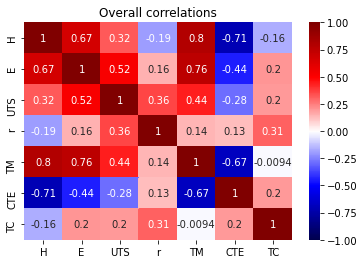

In [18]:
correlation_matrix = data.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True,vmin=-1,vmax=1,cmap="seismic")
plt.title("Overall correlations")
plt.show()

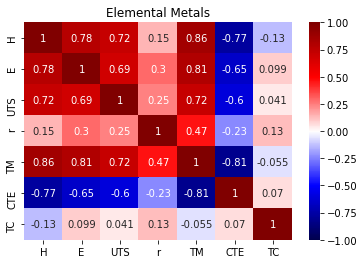

In [19]:
elemental_subset = data[data.Type.str.contains('Elemental_Metal',case=False)]
correlation_matrix = elemental_subset.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True,vmin=-1,vmax=1,cmap="seismic")
plt.title("Elemental Metals")
plt.show()

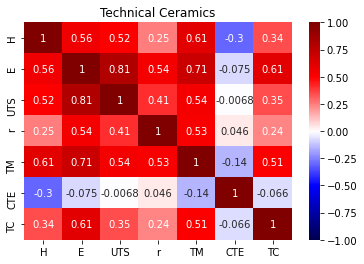

In [20]:
ceramic_subset = data[data.Type.str.contains('Technical_Ceramic',case=False)]
correlation_matrix = ceramic_subset.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True,vmin=-1,vmax=1,cmap="seismic")
plt.title("Technical Ceramics")
plt.show()

Visualize a few different properties using histograms, box plots, and violin plots using matplotlib functionality

Text(0.5, 1.0, 'Hardness')

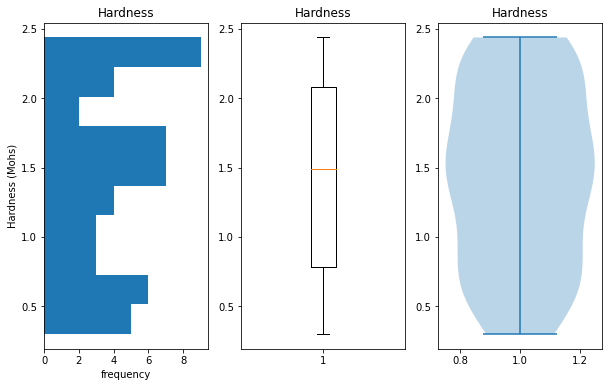

In [21]:
fig, axs = plt.subplots(ncols = 3, figsize = (10,6))

axs[0].hist(data["H"], orientation="horizontal")
axs[0].set_xlabel("frequency")
axs[0].set_ylabel("Hardness (Mohs)")
axs[0].set_title('Hardness')
axs[1].boxplot(data["H"])
axs[1].set_title('Hardness')
axs[2].violinplot(data["H"])
axs[2].set_title('Hardness')

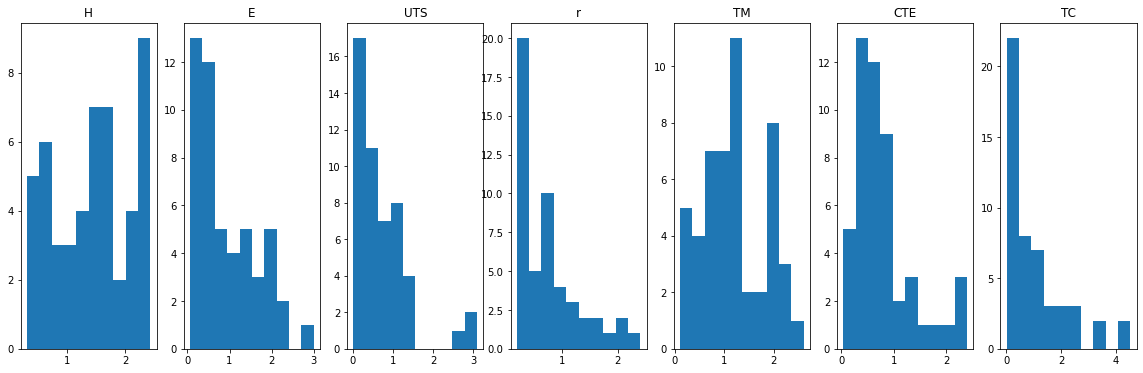

In [22]:
#plot all histograms
fig, axs = plt.subplots(ncols = 7, figsize = (20,6))
counter = -2
for (columnname, columndata) in data.iteritems():
    if counter<0:
        counter +=1
        continue
    else:
        
        axs[counter].hist(data[columnname])
        axs[counter].set_title(columnname)
        counter +=1


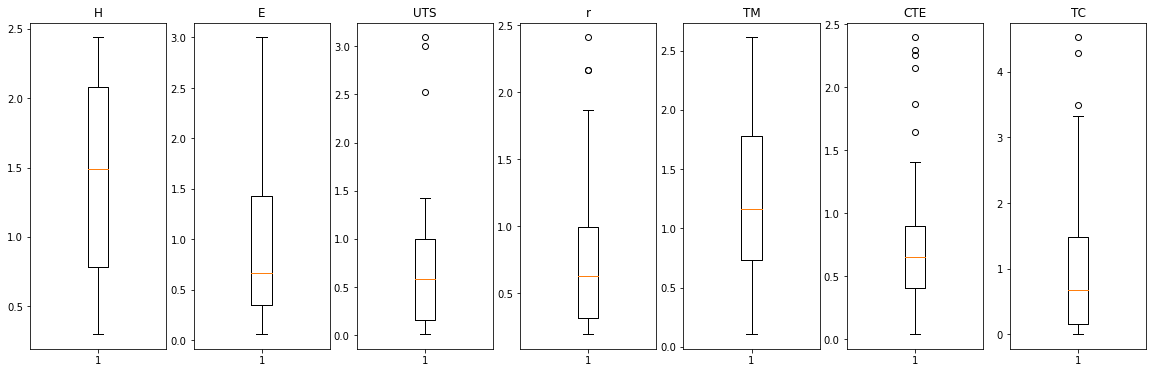

In [23]:
#plot all boxplots
fig, axs = plt.subplots(ncols = 7, figsize = (20,6))
counter = -2
for (columnname, columndata) in data.iteritems():
    if counter<0:
        counter +=1
        continue
    else:
        
        axs[counter].boxplot(data[columnname])
        axs[counter].set_title(columnname)
        counter +=1

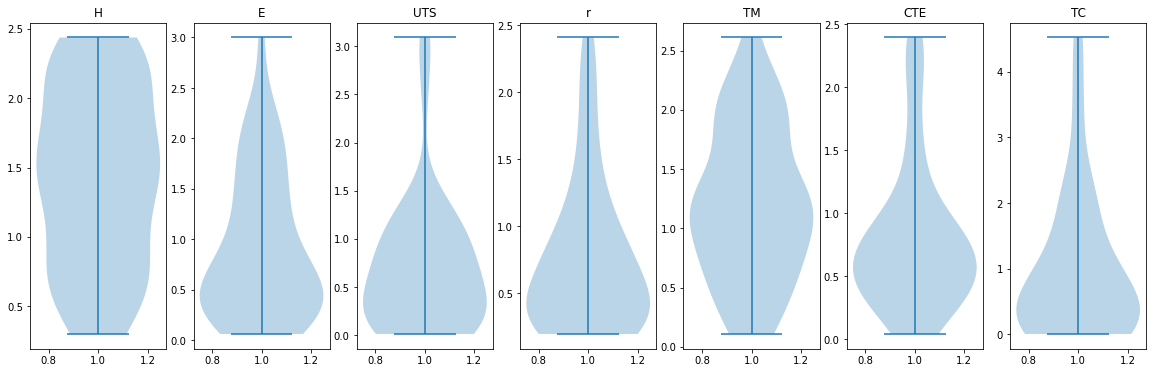

In [24]:
#Plot all violin plots
fig, axs = plt.subplots(ncols = 7, figsize = (20,6))
counter = -2
for (columnname, columndata) in data.iteritems():
    if counter<0:
        counter +=1
        continue
    else:
        
        axs[counter].violinplot(data[columnname])
        axs[counter].set_title(columnname)
        counter +=1

Make a Parallel Coordinate plot with the pandas parallel coordinate function, reoganizing the columns from the original paper.  First recreate Fig 2 and 3A

<AxesSubplot:>

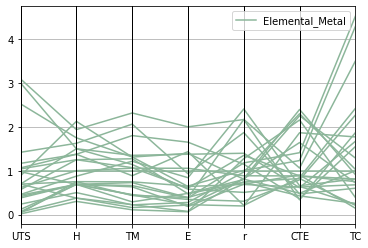

In [25]:
original_subset = data[["Type","UTS", "H","TM","E", "r","CTE","TC"]]
elemental_subset = original_subset[original_subset.Type.str.contains('Elemental_Metal',case=False)]
parallel_coordinates(elemental_subset, 'Type')

<AxesSubplot:>

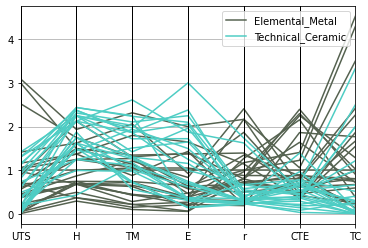

In [26]:
parallel_coordinates(original_subset, 'Type',color=('#556250', '#4ECDC4'))

<AxesSubplot:>

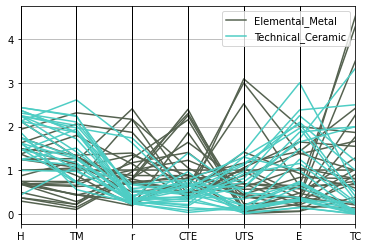

In [27]:
subset = data[["Type","H","TM","r","CTE","UTS","E","TC"]]
parallel_coordinates(subset, 'Type',color=('#556250', '#4ECDC4'))

Text(0, 0.5, 'Ultimate Tensile Strength')

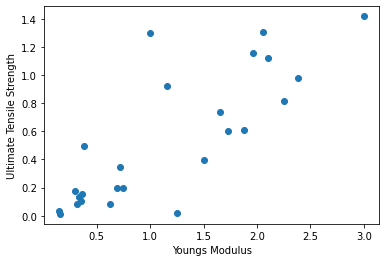

In [28]:
plt.scatter(ceramic_subset["E"],ceramic_subset["UTS"])
plt.xlabel("Youngs Modulus")
plt.ylabel("Ultimate Tensile Strength")


Text(0.5, 0, 'Thermal Conductivity')

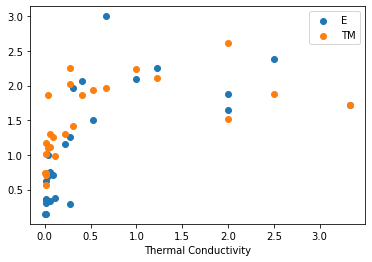

In [29]:
plt.scatter(ceramic_subset["TC"], ceramic_subset["E"])
plt.scatter(ceramic_subset["TC"], ceramic_subset["TM"])
plt.legend(["E","TM"])
plt.xlabel("Thermal Conductivity")

Text(0, 0.5, 'Coefficient of Thermal Expansion')

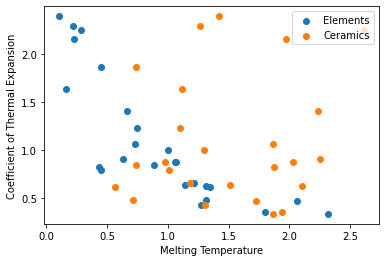

In [30]:
plt.scatter(elemental_subset["TM"],elemental_subset["CTE"])
plt.scatter(ceramic_subset["TM"],elemental_subset["CTE"])
plt.legend(["Elements","Ceramics"])
plt.xlabel("Melting Temperature")
plt.ylabel("Coefficient of Thermal Expansion")